<center>Jakub Rękas, Kacper Szot</center>

# Zadanie 1

 Oblicz przybliżoną wartość pochodnej funkcji, używając wzoru $$f'(x)\approx\frac{f(x+h)-f(x)}{h}$$ Sprawdź działanie programu dla funkcji $\tan(x)$ oraz $x=1$.

Celem zadania jest porównanie błędów obliczeń numerycznych metod liczenia pochodnych dla różnych wartości $h$.

## Różnica prawostronna

Przybliżenie pochodnej liczy się ze wzoru $f'(x)\approx\frac{f(x+h)-f(x)}{h}$

### Biblioteki

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.DataFrame()

- `sys` - biblioteka wykorzystana do poznania wartości $\epsilon_{mach}$
- `numpy` - biblioteka wykorzystana do obliczeń
- `matplotlib.pyplot` - biblioteka wykorzystana do narysowania wykresów
- `pandas` - biblioteka do analizy danych (wykorzystana w sprawozdaniu)

### Funkcje

In [3]:
def approx_d_tan(x,h):
    return (np.tan(x+h)-np.tan(x))/h

In [4]:
def d_tan(x):
    return 1+(np.tan(x)**2)

- `approx_d_tan(x,h)` - funkcja zwraca przybliżoną wartość pochodnej $tan'(x)$
- `d_tan(x)` - funkcja zwraca dokładną wartość analitycznie policzonej pochodnej $tan'(x)=1+\tan^2(x)$

In [5]:
h = 10.0 ** -np.arange(0, 17)

In [6]:
x = 1

$x=1$, pochodna liczona jest w otoczeniu punktu $1$  
$h=10^{-k},k=0,1,2,...,16$

In [7]:
M = abs(2*np.tan(x)/np.cos(x)**2)
epsilon=sys.float_info.epsilon
computional_error = abs(d_tan(x) - approx_d_tan(x,h))
truncation_error = (M*h)/2
rounding_error = 2*epsilon/h

In [8]:
right_computional_error = computional_error.copy()

$M\approx\left |f''(x)\right|\approx\left|\frac{2\tan(x)}{\cos^2(x)}\right|$  
Błąd odcięcia dla różnicy prawostronnej wynosi $\frac{Mh}{2}$  
Błąd numeryczny: $\frac{2\epsilon_{mach}}{h}$

In [9]:
print("Approximate value of M:", M)

Approximate value of M: 10.669858944975315


Przybliżona wartość $M\approx10.669859$

In [10]:
print("Approximate value of machine epsilon:", epsilon)

Approximate value of machine epsilon: 2.220446049250313e-16


Przybliżona wartość $\epsilon_{mach}$

In [11]:
df["computation error"] = computional_error
df["truncation error"] = truncation_error
df["rounding error"] = rounding_error
df

,computation error,truncation error,rounding error
0,7.167966e+00,5.334929e+00,4.440892e-16
1,6.480005e-01,5.334929e-01,4.440892e-15
2,5.431114e-02,5.334929e-02,4.440892e-14
3,5.344396e-03,5.334929e-03,4.440892e-13
4,5.335875e-04,5.334929e-04,4.440892e-12
5,5.335026e-05,5.334929e-05,4.440892e-11
6,5.334628e-06,5.334929e-06,4.440892e-10
7,5.340235e-07,5.334929e-07,4.440892e-09
8,2.554135e-08,5.334929e-08,4.440892e-08
9,1.587681e-07,5.334929e-09,4.440892e-07


**Tab. 1** - Wartości błędów obliczeniowych, metody oraz numerycznych dla kolejnych wartości $h$

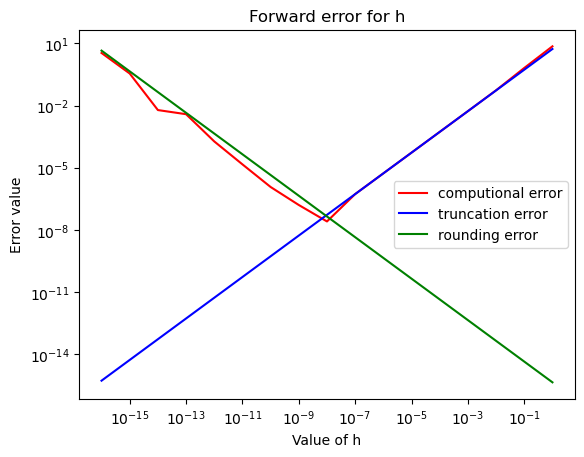

In [12]:
plt.title("Forward error for h") 
plt.xlabel("Value of h") 
plt.ylabel("Error value")
plt.yscale("log")
plt.xscale("log")
plt.plot(h, computional_error, color ="red", label="computional error")
plt.plot(h, truncation_error, color ="blue", label="truncation error")
plt.plot(h, rounding_error, color ="green", label="rounding error")
plt.legend()
plt.show()

**Wyk. 1** - Wykres zależności *forward error* od wartości $h$ dla $h\in[0,1]$ dla różnicy prawostronnej

In [13]:
h = np.linspace(0+epsilon, 0.2, num=5000)

In [14]:
computional_error = abs(d_tan(x) - approx_d_tan(x,h))
truncation_error = (M*h)/2
rounding_error = 2*epsilon/h

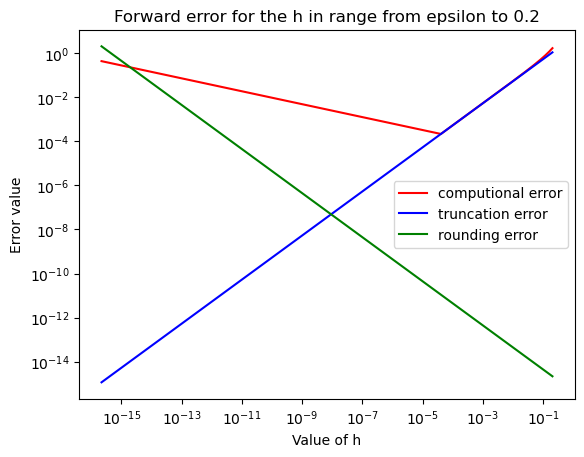

In [15]:
plt.title("Forward error for the h in range from epsilon to 0.2") 
plt.xlabel("Value of h") 
plt.ylabel("Error value") 
plt.yscale("log")
plt.xscale("log")
plt.plot(h, computional_error, color ="red", label="computional error")
plt.plot(h, truncation_error, color ="blue", label="truncation error")
plt.plot(h, rounding_error, color ="green", label="rounding error")
plt.legend()
plt.show()

**Wyk. 2** - Wykres zależności *forward error* od wartości $h$ dla $h\in[0,0.2]$

In [16]:
h = 10.0 ** -np.arange(0, 17)
computional_error = abs(d_tan(x) - approx_d_tan(x,h))

In [17]:
min_computional_error = min(computional_error)
print("Minimal computation error:", min_computional_error)

Minimal computation error: 2.554135258847623e-08


Najmniejszy błąd obliczeniowy: $2.554414\cdot10^{-8}$

In [18]:
h_min = h[np.where(computional_error == min_computional_error)[0][0]]
print("h with smallest computation error:", h_min)

h with smallest computation error: 1e-08


Wartość $h$, dla której błąd obliczeniowy jest najmniejszy $h_{cmin}=10^{-8}$

In [19]:
aprox_h_min = 2*np.sqrt(epsilon/M)
print("Approximate h_min value:", aprox_h_min)

Approximate h_min value: 9.123695225180453e-09


Przybliżona wartość $h_{min}\approx2\sqrt{\epsilon_{mach}/M}\approx9.123695\cdot10^{-9}$

In [20]:
h_min_diff = h_min - aprox_h_min
print("Difference between computated and approximate h_min:", h_min_diff)

Difference between computated and approximate h_min: 8.763047748195471e-10


Różnica między $h_{min}$ wyliczonym numerycznie, a otrzymanym ze wzoru: $8.763048\cdot10^{-10}$

In [21]:
(h_min_diff/h_min) * 100

8.76304774819547

## Metoda różnic centralnych

Przybliżenie pochodnej liczy się ze wzoru $$f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}$$

In [22]:
def central_approx_d_tan(x,h):
    return (np.tan(x+h)-np.tan(x-h))/(2*h)

- `central_approx_d_tan(x,h)` - funkcja zwraca przybliżoną wartość pochodnej funkcji $tan(x)$ w punkcie $x$ z wykorzystaniem metody różnic centralnych

In [23]:
M=abs((2+4*np.sin(x)**2)/(np.cos(x)**4))
computional_error = abs(d_tan(x) - central_approx_d_tan(x,h))
truncation_error = (M/6)*h**2
rounding_error = epsilon/h

In [24]:
central_computional_error = computional_error.copy()

$M\approx\left|f'''(x)\right|\approx\left|\frac{2+4\sin^2(x)}{\cos^4(x)}\right|$  
Błąd odcięcia dla różnic centralnych wynosi: $\frac{Mh^2}{6}$  
Błąd numeryczny wynosi: $\frac{\epsilon_{mach}}{h}$

In [25]:
print("Approximate value of M:", M)

Approximate value of M: 56.70299986727779


Przybliżona wartość $M\approx56.703000$

In [26]:
df["computation error"] = computional_error
df["truncation error"] = truncation_error
df["rounding error"] = rounding_error
df

,computation error,truncation error,rounding error
0,4.518039e+00,9.450500e+00,2.220446e-16
1,9.748838e-02,9.450500e-02,2.220446e-15
2,9.453393e-04,9.450500e-04,2.220446e-14
3,9.450529e-06,9.450500e-06,2.220446e-13
4,9.450397e-08,9.450500e-08,2.220446e-12
5,9.499121e-10,9.450500e-10,2.220446e-11
6,1.047993e-10,9.450500e-12,2.220446e-10
7,6.223022e-12,9.450500e-14,2.220446e-09
8,3.336892e-09,9.450500e-16,2.220446e-08
9,4.774581e-08,9.450500e-18,2.220446e-07


**Tab. 2** - Wartości błędów obliczeniowych, metody oraz numerycznych dla kolejnych wartości $h$

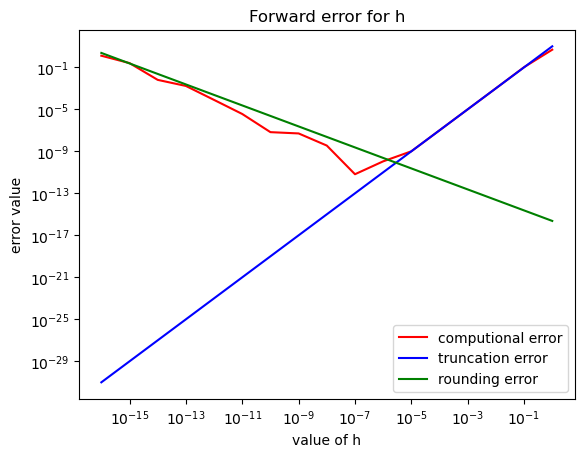

In [27]:
plt.title("Forward error for h") 
plt.xlabel("value of h") 
plt.ylabel("error value") 
plt.yscale("log")
plt.xscale("log")
plt.plot(h, computional_error, color ="red", label="computional error")
plt.plot(h, truncation_error, color ="blue", label="truncation error")
plt.plot(h, rounding_error, color ="green", label="rounding error")
plt.legend()
plt.show()

**Wyk. 3** - Wykres zależności *forward error* od wartości $h$ dla $h\in[0,1]$ dla różnic centralnych

In [28]:
min_computional_error = min(computional_error)
print("Minimal computation error:", min_computional_error)

Minimal computation error: 6.2230220976289274e-12


Minimalny błąd obliczeniowy: $6.223022\cdot10^{-12}$

In [29]:
h_min = h[np.where(computional_error == min_computional_error)[0][0]]
print("h with smallest computation error:", h_min)

h with smallest computation error: 1e-07


Wartość $h$, dla której błąd obliczeniowy jest najmniejszy $h_{cmin}=10^{-7}$

In [30]:
aprox_h_min = ((3*epsilon)/M) ** (1/3)
print("Approximate h_min value:", aprox_h_min)

Approximate h_min value: 2.273274156839064e-06


Przybliżona wartość $h_{min}\approx\sqrt[3]{3\epsilon_{mach}/M}\approx2.273274\cdot 10^{-6}$

In [31]:
h_min_diff = abs(h_min - aprox_h_min)
print("Difference between computated and approximate h_min:", h_min_diff)

Difference between computated and approximate h_min: 2.173274156839064e-06


Różnica między $h_{min}$ wyliczonym numerycznie, a otrzymanym ze wzoru: $2.173274\cdot10^{-6}$

In [32]:
(h_min_diff/h_min) * 100

2173.274156839064

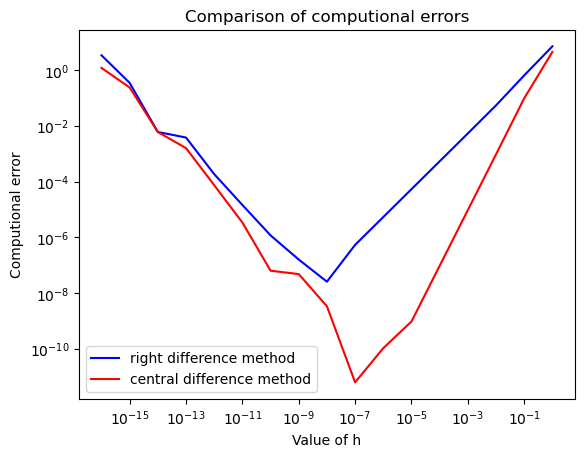

In [33]:
plt.title("Comparison of computional errors")
plt.xlabel("Value of h")
plt.ylabel("Computional error")
plt.xscale("log")
plt.yscale("log")
plt.plot(h, right_computional_error, color="blue", label="right difference method")
plt.plot(h, central_computional_error, color="red", label="central difference method")
plt.legend()
plt.show()

**Wyk. 4** - Porównanie błędów obliczeniowych metody różnicy prawostronnej i metody róznic centralnych

## Wnioski
Przeprowadzony eksperyment wykazał, że metoda różnic centralnych generuje wyniki bliższe wyliczonym analitycznie niż metoda różnicy prawostronnej.

# Zadanie 2

Niech ciąg $x_k$ będzie zdefiniowany przez następujące równanie różnicowe

$$x_{k+1}=2.25x_k-0.5x_{k-1}$$

oraz niech $x_0=\frac13$ i $x_1=\frac1{12}$.

Celem zadania jest napisanie programu generującego pierwsze $n$ wyrazów tego ciągu, używając pojedynczej prezycji $n=255$, precyzji podwójnej $n=60$ oraz obliczeń z wykorzystaniem biblioteki `Fractions` $n=225$ oraz porównanie błędów tych reprezentacji.

Następnie należy porównać otrzymane wyniki z dokładnym rozwiązaniem równania różnicowego

$$x_k=\frac{4^{-k}}{3}.$$

### Biblioteki

In [34]:
from functools import cache
from fractions import Fraction

Poza bibliotekami wykorzystanymi w zadaniu 1 zostały wykorzystane także:

- `functools` - adnotacja `cache` aby funkcje obliczające k-ty wyraz ciągu na podstawie wzoru rekurencyjnego wykonywały się w czasie $O(n)$
- `fractions` - reprezentacja `Fraction` dla liczb wymiernych

In [35]:
@cache
def x32(k):
    if(k==0): return np.float32(1/3)
    if(k==1): return np.float32(1/12)
    return (np.float32(2.25) * x32(k-1) - np.float32(.5)* x32(k-2))

@cache
def x64(k):
    if(k==0): return np.float64(1/3)
    if(k==1): return np.float64(1/12)
    return (np.float64(2.25) * x64(k-1) - np.float64(.5) * x64(k-2))

@cache
def x_fra(k):
    if(k==0): return Fraction(1,3)
    if(k==1): return Fraction(1,12)
    return (Fraction("2.25") * x_fra(k-1) - Fraction(1,2) * x_fra(k-2))
def xk(k):return (4.0**(-k))/3

In [36]:
argument_for_x32 = np.arange(start=0,stop=225,step=1)
argument_for_x64 = np.arange(start=0,stop=60,step=1)
argument_for_x_fra = np.arange(start=0,stop=225,step=1)
argument_for_xk = np.arange(start=0,stop=225,step=1)

Argumenty dla poszczególnych funkcji

In [37]:
%%capture
values_of_x32 = np.array([ x32(x) for x in argument_for_x32 ])
values_of_x64 = np.array([ x64(x) for x in argument_for_x64 ])
values_of_x_fra = np.array([ x_fra(x) for x in argument_for_x_fra ])
values_of_xk = np.array([ xk(x) for x in argument_for_xk ])

Wykorzystana została adnotacja `%%capture` w celu ukrycia warninga pythona o *overflow* zmiennej typu `float32`  
Wyniki obliczeń zostały zamienione na typ wektorowy

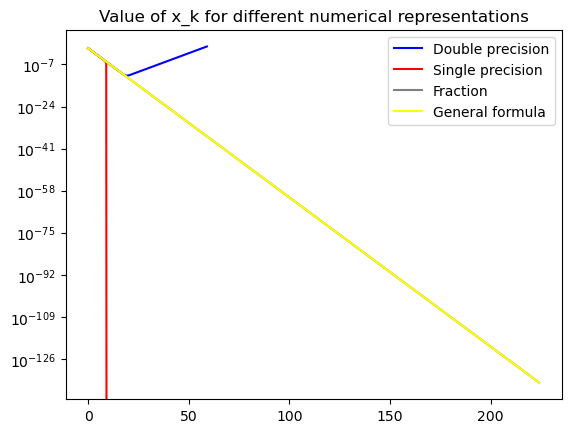

In [38]:
plt.title("Value of x_k for different numerical representations")
plt.semilogy(argument_for_x64, values_of_x64, color ="blue", label="Double precision")
plt.semilogy(argument_for_x32, values_of_x32, color ="red", label="Single precision")
plt.semilogy(argument_for_x_fra, values_of_x_fra, color ="gray", label="Fraction")
plt.semilogy(argument_for_xk, values_of_xk, color ="yellow", label="General formula")
plt.legend()
plt.show()

**Wyk. 5** - Wykres wywołań poszczególnych funkcji obliczających $k$-ty wyraz ciągu dla zmiennej typu `float32` (pojedyncza precyzja), `float64` (podwójna precyzja) oraz dla reprezentacji `Fraction`. Żółtą linią został pokazane wyrazy ciągu wyliczone na podstawie wyrazu ogólnego.

- Reprezentacja `float32` szybko zmierza do $-\infty$ ze względu na zbyt małą liczbę bitów w cesze co powoduje spadek precyzji.
- Reprezentacja `float64` rośnie wraz ze wzrostem $k$, dłużej niż `float32` utrzymuje prawidłowe wartości
- Reprezentacja `Fraction` zachowuje się tak samo jak wartość policzona na podstawie wzoru ogólnego, ponieważ nie jest obarczona błędem numerycznym.

In [39]:
error_x32 = abs(values_of_x32 - values_of_xk)/values_of_xk
error_x64 = abs(values_of_x64 - values_of_xk[:60])/values_of_xk[:60]
error_fra = abs(values_of_x_fra - values_of_xk)/values_of_xk

Wartości błędu względnego dla reprezentacji `float32`, `float64`, `Fraction`.

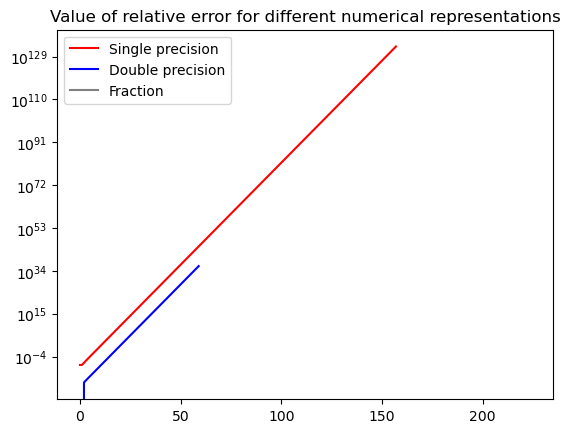

In [40]:
plt.title("Value of relative error for different numerical representations")
plt.semilogy(argument_for_x32, error_x32, color="red", label="Single precision")
plt.semilogy(argument_for_x64, error_x64, color="blue", label="Double precision")
plt.semilogy(argument_for_x_fra, error_fra, color="gray", label="Fraction")
plt.legend()
plt.show()

**Wyk. 6** - Wykres błędu względnego dla $k$-tego wyrazu ciągu dla reprezentacji `float32`, `float64`, `Fraction`. Dla `Fraction` błąd jest równy $0$ ze względu na tę samą reprezentację co dla wyrazu ogólnego.

## Wnioski
Najlepsza do tego zadania jest reprezentacja `Fraction`, ponieważ nie jest obarczona błędem numerycznym takim jak reprezentacje `float32` oraz `float64`, gdzie błąd zwiększa się z każdym kolejnym wyrazem.